In [1]:
import sys
sys.path.append(".")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1


In [2]:
import pyforest 
from DataPrep.load_data import load_data
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import mean_squared_error, r2_score
register_matplotlib_converters()
import warnings 
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'pyforest'

In [3]:
df = load_data()

In [4]:
df = df[df["Label"]==0]

<IPython.core.display.Javascript object>

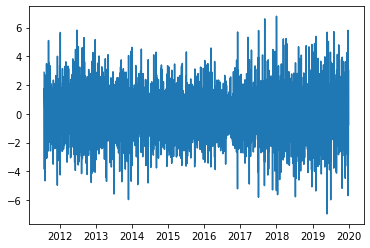

<IPython.core.display.Javascript object>

(-18.7203174031334, 2.0328209052612866e-30, 26, 3050, {'1%': -3.432495840047687, '5%': -2.862488095901948, '10%': -2.567274695404461}, 10101.001412503996)


In [5]:
plt.plot(np.sqrt(df["Energy (kWh)"]).diff().dropna())
plt.show()

print(adfuller(np.sqrt(df["Energy (kWh)"]).diff().dropna()))

<IPython.core.display.Javascript object>

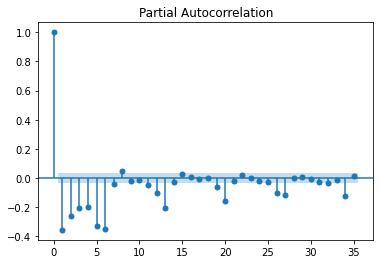

<IPython.core.display.Javascript object>

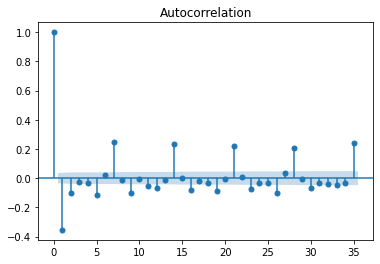

In [114]:
plot_pacf(np.sqrt(df["Energy (kWh)"]).diff().dropna())
plt.show()
plot_acf(np.sqrt(df["Energy (kWh)"]).diff().dropna())
plt.show()

In [6]:
df = df.drop(columns=["Charging Time (mins)","Parking Time (mins)"])

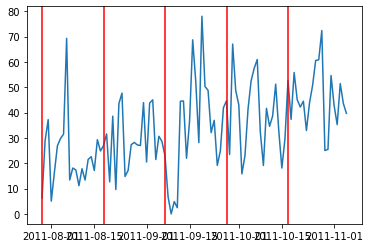

In [210]:
n=100
plt.plot(df["Energy (kWh)"][0:n])
for i in range(int(n/20)):
    plt.axvline(x=df["Energy (kWh)"].index[20*i],ymin=0,ymax=100, c="red")
plt.show()

In [7]:
mod = pd.read_csv("ArimaModels.csv")


<IPython.core.display.Javascript object>

In [14]:
for i in range(7):
    print(mod[mod["AIC"]==min(mod["AIC"][mod["Label"]==i])])

    Unnamed: 0  Label   ar    d   ma         AIC           r^2           RMSE  \
53          53    0.0  1.0  2.0  3.0  793.673482 -2.099459e+07  144782.644459   

           MAPE            MAE      SMAPE  
53  1488.775703  143585.970048  99.682468  
     Unnamed: 0  Label   ar    d   ma           AIC      r^2       RMSE  \
559         559    1.0  8.0  1.0  9.0  23208.890044 -0.23514  76.646233   

         MAPE        MAE      SMAPE  
559  0.438521  62.807392  17.167633  
     Unnamed: 0  Label   ar    d   ma           AIC       r^2       RMSE  \
829         829    2.0  7.0  1.0  9.0  23341.287128 -0.036396  77.041543   

         MAPE        MAE      SMAPE  
829  0.465567  63.014758  13.786944  
      Unnamed: 0  Label   ar    d   ma           AIC       r^2       RMSE  \
1189        1189    3.0  9.0  1.0  9.0  22487.124536 -0.222779  36.085235   

              MAPE        MAE      SMAPE  
1189  7.526649e+14  28.878904  16.672709  
      Unnamed: 0  Label   ar    d   ma           AIC

In [26]:
pred = []
days_pred = []
train = int((len(df["Energy (kWh)"].index))*0.01)
re = len(df["Energy (kWh)"].index)-train
a = df.index[0]#.to_timestamp()
b = df.index[train]#.to_timestamp()

for i in range(50):#re):
    sam = SARIMAX(df["Energy (kWh)"][:b],order=(1,2,3) ,freq="D")
    sam_fit = sam.fit()

    days = 1
    n = b + pd.Timedelta(days=days)
    y_pred = sam_fit.forecast()
    #n1 = n + pd.Timedelta(days=1)
    #y_pred = sam_fit.forecast(steps = days)
    #y_pred = sam_fit.predict(start=n,end=n,typ="levels")
    #y_pred.index=y_pred.index.to_timestamp()
    
    pred.append(float(y_pred))

    a = a + pd.Timedelta(days=days)
    b = b + pd.Timedelta(days=days)
    days_pred.append(n)
    print(f"Progress {i}:{re}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 0:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 1:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 2:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 3:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 4:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 5:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 6:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 7:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 8:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 9:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 10:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 11:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 12:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 13:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 14:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 15:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 16:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 17:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 18:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 19:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 20:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 21:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 22:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 23:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 24:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 25:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 26:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 27:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 28:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 29:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 30:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 31:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 32:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 33:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 34:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 35:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 36:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 37:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 38:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 39:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 40:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 41:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 42:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 43:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 44:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 45:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 46:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 47:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 48:3048


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Progress 49:3048


In [27]:
sam_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Energy (kWh)   No. Observations:                   80
Model:               SARIMAX(1, 2, 3)   Log Likelihood                -329.173
Date:                Fri, 23 Apr 2021   AIC                            668.346
Time:                        14:22:57   BIC                            680.130
Sample:                    07-29-2011   HQIC                           673.064
                         - 10-16-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3160      0.655      0.482      0.630      -0.968       1.600
ma.L1         -2.0529      0.660     -3.112      0.002      -3.346      -0.760
ma.L2          1.1086      1.282      0.865      0.387      -1.403       3.620
ma.L3         -0.0558      0.627     -0.089      0.929      -1.285       1.173
sigma2       227.9341      0.009   2.55e+04      0.000     227.917     227.952
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.24
Prob(Q):                              0.97   Prob(JB):                         0.20
Heteroskedasticity (H):               0.82   Skew:                             0.42
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.88e+21. Standard errors may be unstable.
"""

In [28]:
pred = pd.DataFrame(pred)
pred.index = days_pred

<IPython.core.display.Javascript object>

r^2 score -0.135625994171102


<IPython.core.display.Javascript object>

RMSE 17.973842966748734


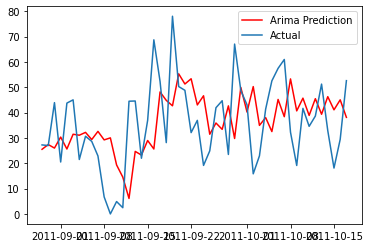

In [29]:
plt.plot(pred, color="red", label="Arima Prediction")
plt.plot(df["Energy (kWh)"][days_pred[0]:days_pred[-1]],label="Actual")
plt.legend()
print(f'r^2 score {r2_score(df["Energy (kWh)"][days_pred[0]:days_pred[-1]],pred)}')
print(f'RMSE {np.sqrt(mean_squared_error(df["Energy (kWh)"][days_pred[0]:days_pred[-1]],pred))}')
plt.show()

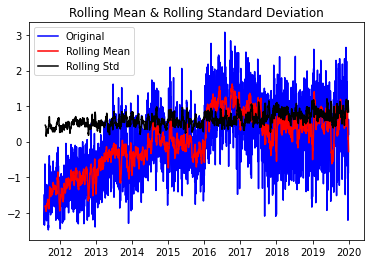

In [73]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [74]:
result = adfuller(df)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.9287737196494232
p-value: 0.04210286409426261
Critical Values:
	1%: -3.432495840047687
	5%: -2.862488095901948
	10%: -2.567274695404461


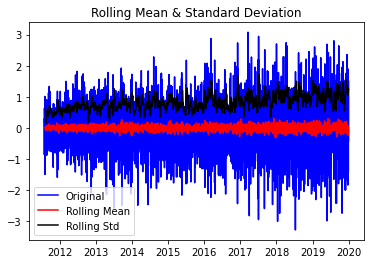

ADF Statistic: -18.221402689118325
p-value: 2.3793558254538086e-30
Critical Values:
	1%: -3.432495840047687
	5%: -2.862488095901948
	10%: -2.567274695404461


In [75]:
get_stationarity(df.diff().dropna())

In [20]:
df_log = np.log(df)

<IPython.core.display.Javascript object>

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1\env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


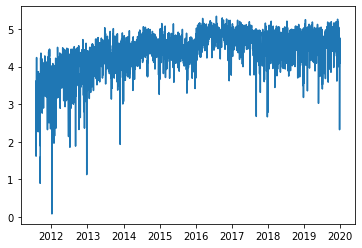

In [21]:
plt.plot(df_log)
plt.show()

In [22]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

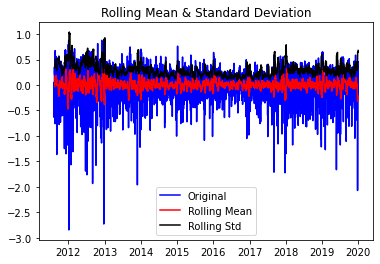

ADF Statistic: -15.279287053397598
p-value: 4.601558737291911e-28
Critical Values:
	1%: -3.432513589345956
	5%: -2.862495935221514
	10%: -2.5672788689570383


In [23]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

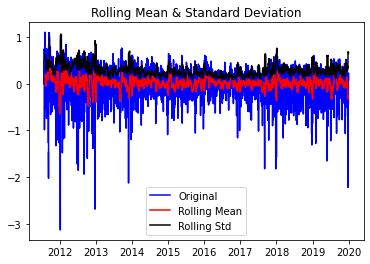

MissingDataError: exog contains inf or nans

In [24]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

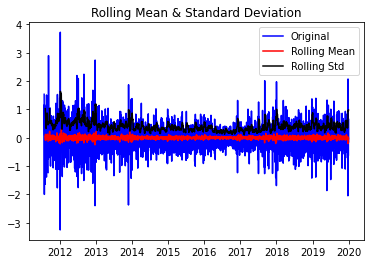

MissingDataError: exog contains inf or nans

In [25]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

In [35]:
df_log_shift

Date
2011-07-30    1.534065
2011-07-31    0.249996
2011-08-01   -1.998902
2011-08-02    1.168002
2011-08-03    0.505658
                ...   
2019-12-27    0.074321
2019-12-28    0.248400
2019-12-29   -0.631313
2019-12-30    0.669096
2019-12-31   -0.145228
Name: Energy (kWh), Length: 3077, dtype: float64

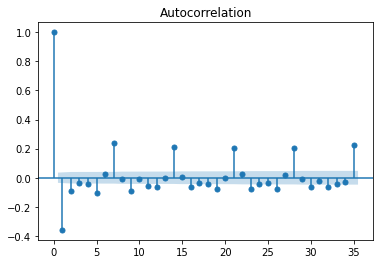

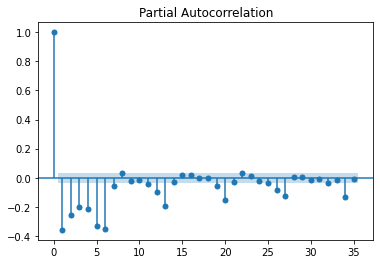

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df.diff().dropna())
plt.show()
plot_pacf(df.diff().dropna())
plt.show()

In [53]:
df_log = np.log(df)

<IPython.core.display.Javascript object>

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1\env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [65]:
df_sqrt = np.sqrt(df)

<IPython.core.display.Javascript object>

In [60]:
df_reindex = pd.DataFrame()
idx = pd.period_range(min(df_sqrt.index), max(df_sqrt.index))
filling = df_sqrt.reindex(idx, fill_value = 0)
df_reindex = df_reindex.append(filling)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
df_sqrt.index = df_sqrt.index.to_period("D")

In [62]:
df_sqrt.index = df_sqrt.index.to_timestamp()

In [63]:
df_sqrt = df_reindex.T

In [66]:
df_sqrt

Date
2011-07-29     2.499891
2011-07-30     5.383182
2011-07-31     6.099931
2011-08-01     2.245271
2011-08-02     4.026217
                ...    
2019-12-27     9.339641
2019-12-28    10.574739
2019-12-29     7.712263
2019-12-30    10.776409
2019-12-31    10.021627
Name: Energy (kWh), Length: 3078, dtype: float64

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1\env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1\env\lib\s

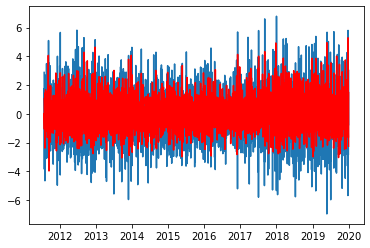

In [69]:
decomposition = seasonal_decompose(df_sqrt) 
model = ARIMA(df_sqrt, order=(6,1,2))
results = model.fit(disp=-1)
plt.plot(df_sqrt.diff().dropna())
plt.plot(results.fittedvalues, color='red')
plt.show()

In [73]:
predictions_ARIMA_diff[0]=predictions_ARIMA_diff[0]+df_log.iloc[0]



In [75]:
predictions_ARIMA_diff_cumsum

2011-08-04    0.000157
2011-08-05   -0.060774
2011-08-06    0.023213
2011-08-07   -0.084849
2011-08-08   -0.262625
                ...   
2019-12-27    1.605191
2019-12-28    1.445807
2019-12-29    1.262753
2019-12-30    1.243184
2019-12-31    0.926439
Freq: D, Length: 3072, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

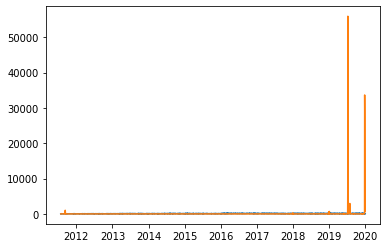

In [68]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_sqrt.iloc[0], index=df_sqrt.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.show()

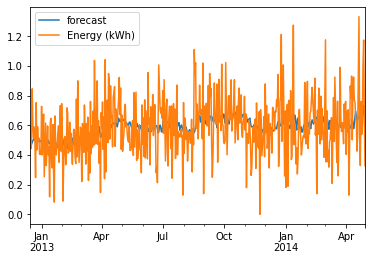

In [79]:
results.plot_predict(500,1000)
plt.show()